<a href="https://colab.research.google.com/github/arpitarumma/NeuralNetworkmodels/blob/main/NNDL10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/NNDL6THSM/archive.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)

['Train', 'Val']

In [17]:
train_dir = "/content/dataset/Train"
val_dir = "/content/dataset/Val"


In [18]:
import os

print("Train set categories:", os.listdir(train_dir))
print("Validation set categories:", os.listdir(val_dir))


Train set categories: ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
Validation set categories: ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']


In [19]:
# Define dataset path
data_dir = os.path.join(os.getcwd(), "dataset")

In [20]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

# Data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                             horizontal_flip=True, fill_mode='nearest')

train_generator = datagen.flow_from_directory(train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                              batch_size=BATCH_SIZE, class_mode='categorical')
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_dir,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               batch_size=BATCH_SIZE, class_mode='categorical')

Found 4737 images belonging to 4 classes.
Found 512 images belonging to 4 classes.


In [22]:
# Build CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
ehistory = model.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.3797 - loss: 1.3030 - val_accuracy: 0.4688 - val_loss: 1.0773
Epoch 2/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.5568 - loss: 0.9855 - val_accuracy: 0.6270 - val_loss: 0.8405
Epoch 3/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.6145 - loss: 0.9062 - val_accuracy: 0.5020 - val_loss: 1.2035
Epoch 4/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.6595 - loss: 0.8192 - val_accuracy: 0.6582 - val_loss: 0.7942
Epoch 5/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.6393 - loss: 0.8431 - val_accuracy: 0.5508 - val_loss: 1.2080


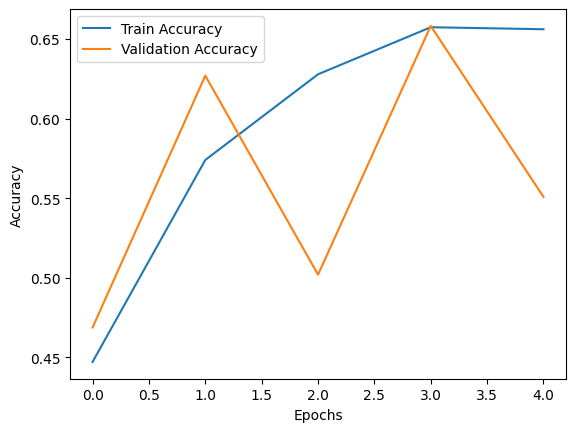

In [27]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
#Plot Accuracy and Loss
plt.plot(ehistory.history['accuracy'], label='Train Accuracy')
plt.plot(ehistory.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
import numpy as np

# Function to relabel tumor categories
def relabel_generator(generator):
    class_indices = generator.class_indices
    label_map = {"Glioma": "Malignant", "Meningioma": "Benign", "Pituitary": "Benign", "No Tumor": "No Tumor"}

    while True:
        batch_x, batch_y = next(generator)
        new_labels = np.zeros((batch_y.shape[0], 3))  # 3 classes: Benign, Malignant, No Tumor

        for i, label in enumerate(batch_y):
            original_class = list(class_indices.keys())[np.argmax(label)]
            new_class = ["Benign", "Malignant", "No Tumor"].index(label_map[original_class])
            new_labels[i][new_class] = 1

        yield batch_x, new_labels

# Load data with relabeled classes
train_generator = relabel_generator(datagen.flow_from_directory(train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                batch_size=BATCH_SIZE, class_mode='categorical'))
val_generator = relabel_generator(ImageDataGenerator(rescale=1./255).flow_from_directory(val_dir,
                                                                                        target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                                        batch_size=BATCH_SIZE,
                                                                                        class_mode='categorical'))


Found 4737 images belonging to 4 classes.
Found 512 images belonging to 4 classes.


In [36]:
import os

val_dir = "/content/dataset/Val"  # Update if needed

if os.path.exists(val_dir):
    print("Validation directory found!")
    print("Subdirectories:", os.listdir(val_dir))  # List tumor categories
else:
    print("Validation directory NOT found! Check your dataset path.")


Validation directory found!
Subdirectories: ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']


In [37]:
glioma_path = os.path.join(val_dir, "Glioma")  # Path to Glioma folder

if os.path.exists(glioma_path):
    print("Glioma directory found!")
    print("Available images:", os.listdir(glioma_path)[:5])  # Show first 5 images
else:
    print("Glioma directory NOT found! Check dataset structure.")


Glioma directory found!
Available images: ['labels', 'images']


In [42]:
img_path = os.path.join(glioma_path, "/content/dataset/Val/Glioma/gg(9).jpg")  # Replace with an actual file name
print("Using image:", img_path)


Using image: /content/dataset/Val/Glioma/gg(9).jpg


Dataset directory found at: /content/dataset
Contents of dataset directory: ['Train', 'Val']
Validation directory found at: /content/dataset/Val
Contents of validation directory: ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
Glioma directory found at: /content/dataset/Val/Glioma
Contents of Glioma directory: ['labels', 'images']
Images directory found at: /content/dataset/Val/Glioma/images
Contents of Images directory: ['Tr-gl_0509.jpg', 'gg (409).jpg', 'gg (47).jpg', 'gg (352).jpg', 'gg (513).jpg']
Using image: /content/dataset/Val/Glioma/images/Tr-gl_0509.jpg


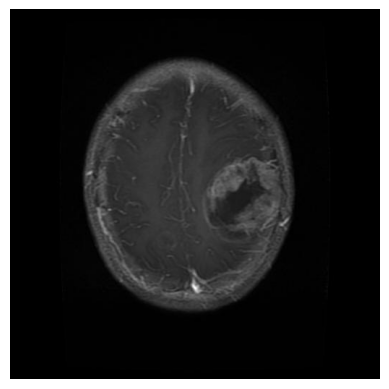

In [47]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img

# Define dataset path
data_dir = "/content/dataset"  # Root directory where 'Train' and 'Val' folders reside

# Construct paths to 'Val', 'Glioma', and 'images' directories
val_dir = os.path.join(data_dir, "Val")
glioma_path = os.path.join(val_dir, "Glioma")
images_path = os.path.join(glioma_path, "images")  # Path to the 'images' subdirectory

# Check if the directories exist and print contents
if os.path.exists(data_dir):
    print(f"Dataset directory found at: {data_dir}")
    print(f"Contents of dataset directory: {os.listdir(data_dir)}")
else:
    print(f"Dataset directory NOT found at: {data_dir}")

if os.path.exists(val_dir):
    print(f"Validation directory found at: {val_dir}")
    print(f"Contents of validation directory: {os.listdir(val_dir)}")
else:
    print(f"Validation directory NOT found at: {val_dir}")

if os.path.exists(glioma_path):
    print(f"Glioma directory found at: {glioma_path}")
    print(f"Contents of Glioma directory: {os.listdir(glioma_path)}")

    if os.path.exists(images_path):
        print(f"Images directory found at: {images_path}")
        print(f"Contents of Images directory: {os.listdir(images_path)[:5]}")  # Show first 5 images

        # Now try to load and display an image if it exists
        image_files = [f for f in os.listdir(images_path) if os.path.isfile(os.path.join(images_path, f))]
        if image_files:
            img_path = os.path.join(images_path, image_files[0])
            print("Using image:", img_path)
            img = load_img(img_path)
            plt.imshow(img)
            plt.axis("off")
            plt.show()
        else:
            print("No image files found in the Images directory.")
    else:
        print(f"Images directory NOT found at: {images_path}")
else:
    print(f"Glioma directory NOT found at: {glioma_path}")